# HOMEWORK 5

In this homework you are going to implement the **Floyd-Steinberg dithering** algorithm. Dithering, in general, means that we are adding noise to the signal (in our case digital image) in order to perceive it better. In other words, by adding the noise the objective quality will be worse but the subjective quality will be better (i.e. the image will "look" better).

The details of FS dithering can be found in this [wiki](https://en.wikipedia.org/wiki/Floyd%E2%80%93Steinberg_dithering) page. In order to implement the dithering, we will implement the following steps:
* Define colour pallette
* Quantize the image to obtain the baseline and compute the average quantization error
* Implement FS dithering and compute the average quantization error

You will also have to answer the question at the end of this notebook.

Note: In this homework, you will have the chance to earn some extra points. See the "Bonus" section at the end of the notebook. Good luck!

As always, you are encouraged to use your own images :-)

In [119]:
import cv2
import math
import numpy as np
from matplotlib import pyplot as plt
plt.rcParams['figure.figsize'] = [15, 10]

Let's load the image.

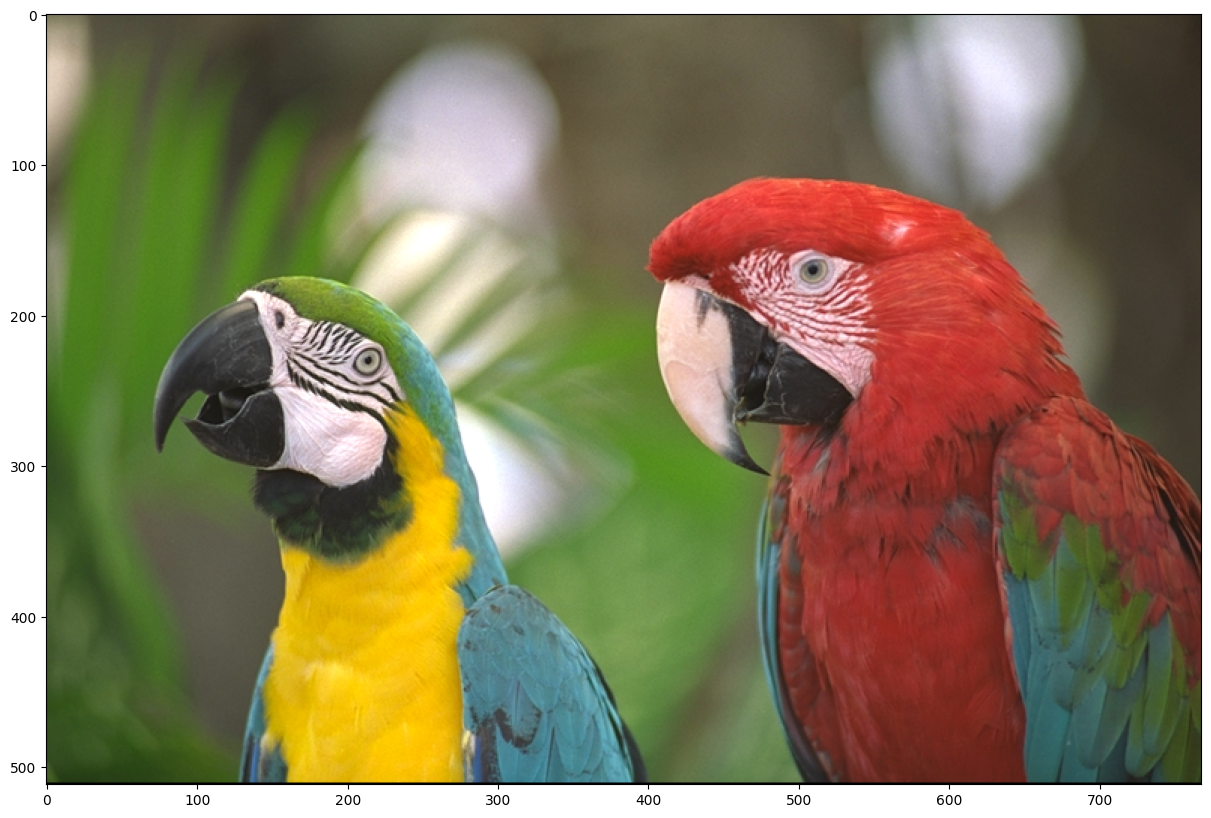

In [120]:
# Load image
img = cv2.imread('../data/kodim23.png')
# Convert it to RGB
img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
# Plot it
plt.imshow(img)

Let's start with gray tones first.

In [121]:
# Black, dark gray, light gray, white
colors = np.array([[0, 0, 0],
                   [64, 64, 64],
                   [192, 192, 192],
                   [255, 255, 255]])

Using the colour pallette, let's quantize the original image.

In [122]:
# Cast the image to float
img = img.astype(np.float32)

# Prepare for quantization
rows, cols, channels = img.shape
quantized = np.zeros_like(img)

# Apply quantization
for r in range(rows):
    for c in range(cols):
        # Extract the original pixel value
        pixel = img[r][c][:]
        
        # Find the closest colour from the pallette (using absolute value/Euclidean distance)
        # Note: You may need more than one line of code here
        distances = np.sqrt(np.sum((colors - pixel)**2, axis=1))
        # https://stackoverflow.com/questions/54242194/find-the-closest-color-to-a-color-from-given-list-of-colors
        index_of_closest_color = np.argmin(distances)
        new_pixel =  colors[index_of_closest_color]
        
        # Apply quantization
        quantized[r, c, :] = new_pixel

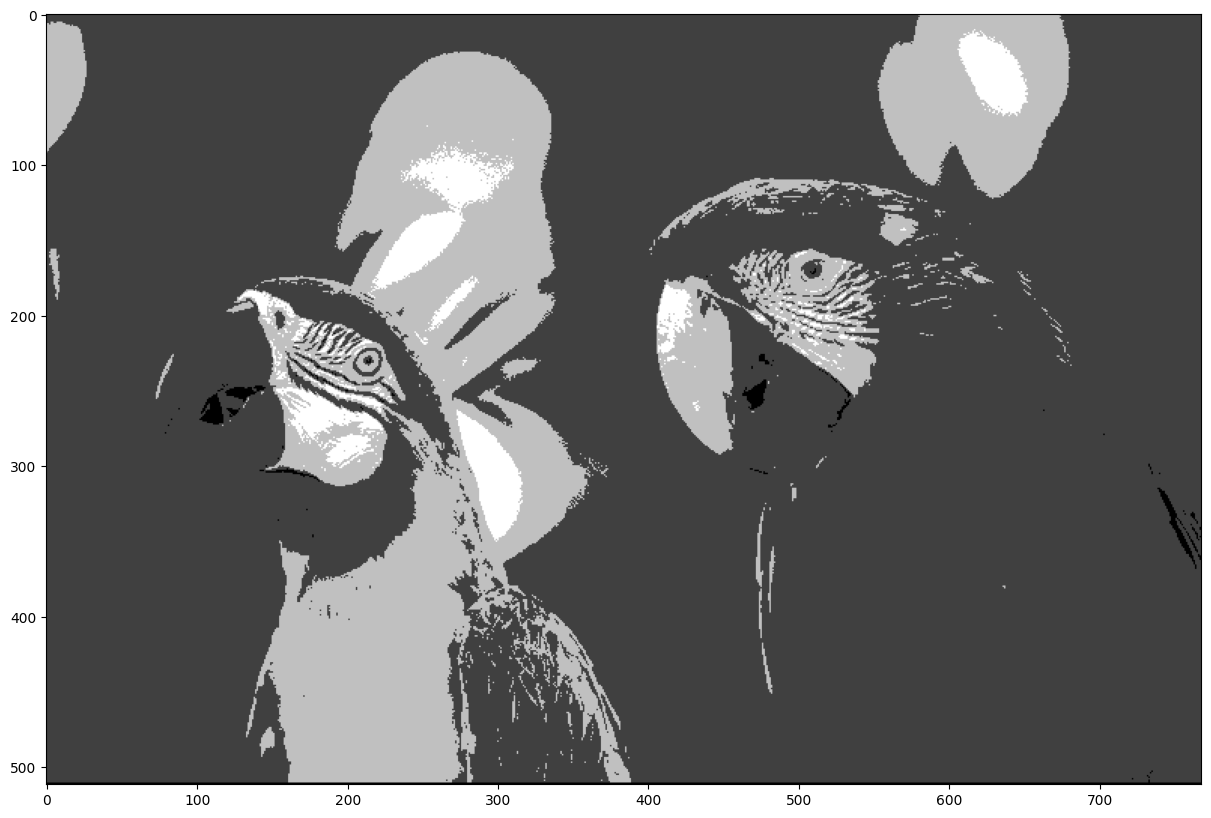

In [123]:
# Show quantized image (don't forget to cast back to uint8)
plt.imshow(quantized.astype(np.uint8))

In [124]:
# Compute average quantization error
avg_quant_error = np.mean(np.abs(img - quantized))
print("Average quantization error", avg_quant_error)

Average quantization error 32.75775


#### Floyd-Steinberg Dithering
We are now going to implement the FS dithering and compare it to the optimally quantized image we have calculated above.

In [125]:
# Make a temporal copy of the original image, we will need it for error diffusion
img_tmp = np.copy(img)
dithering = np.zeros_like(img)

for r in range(1, rows-1):
    for c in range(1, cols-1):
        # Extract the original pixel value
        pixel = img_tmp[r, c, :]
        # Find the closest colour from the palette (using absolute value/Euclidean distance)
        # Note: You may need more than one line of code here
        distances = np.sqrt(np.sum((colors - pixel)**2, axis=1))
        index_of_closest_color = np.argmin(distances)
        new_pixel = colors[index_of_closest_color]



        # Compute quantization error
        quant_error = pixel - new_pixel
        
        # Diffuse the quantization error accroding to the FS diffusion matrix
        # Note: You may need more than one line of code here
        img_tmp[r, c+1]   += quant_error * 7 / 16
        img_tmp[r+1, c-1] += quant_error * 3 / 16
        img_tmp[r+1, c]   += quant_error * 5 / 16
        img_tmp[r+1, c+1] += quant_error * 1 / 16
        
        # Apply dithering
        dithering[r, c, :] = new_pixel

(<Axes: >, <matplotlib.image.AxesImage at 0x2613f31d950>)

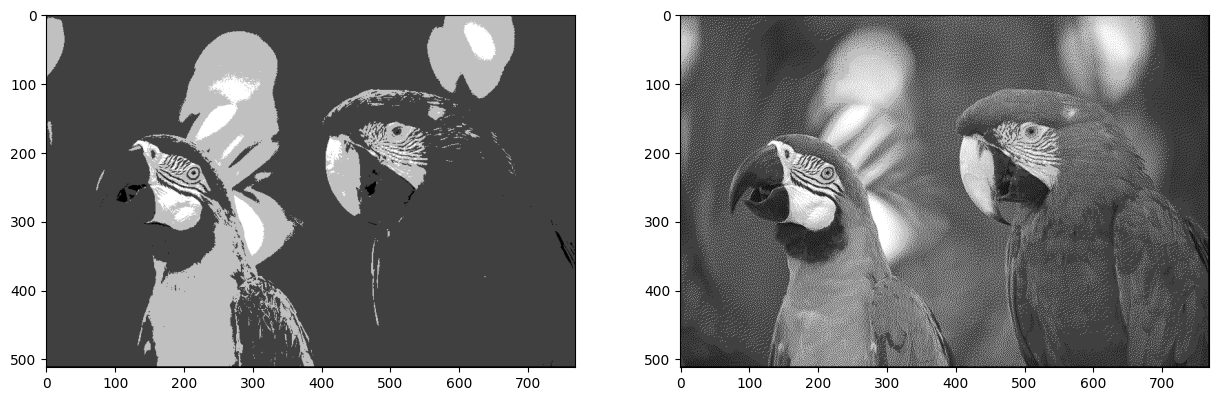

In [126]:
# Show quantized image (don't forget to cast back to uint8)
plt.subplot(121), plt.imshow(quantized.astype(np.uint8))   # optimally quantized
plt.subplot(122), plt.imshow(dithering.astype(np.uint8))   # dithering

In [127]:
# Compute average quantization error for dithered image
avg_dith_error = np.mean(np.abs(img - dithering))
print("Average dither error", avg_dith_error)

Average dither error 41.83168


### Questions
* Which image has higher quantization error? Optimally quantized or dithered?
* Which image looks better to you?
* Can you repeat the same process using only two colours: black and white? Show me :-)

### Answers
* The dithered image has a higher error. This is because dithering intentionally adds the quantization error to neighboring pixels.
* The dithered image looks better. Simple quantization creates large, flat areas of color (banding), while dithering breaks these up, creating the illusion of more tones.
* Yes! With pleasure)

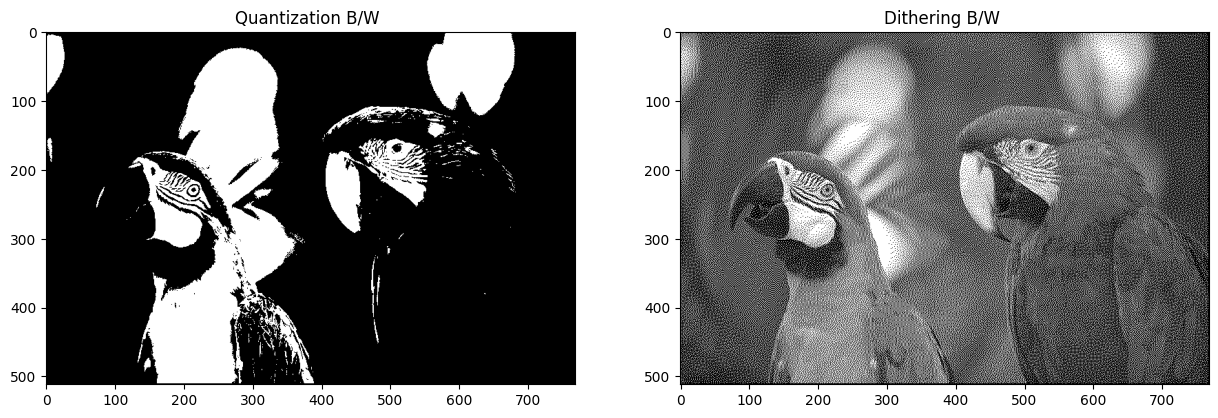

In [128]:
# New palette black and white
bw_colors = np.array([[0, 0, 0], [255, 255, 255]])

quantized_bw = np.zeros_like(img)
for r in range(rows):
    for c in range(cols):
        pixel = img[r, c, :]
        distances = np.sqrt(np.sum((bw_colors - pixel)**2, axis=1))
        new_pixel = bw_colors[np.argmin(distances)]
        quantized_bw[r, c, :] = new_pixel


img_tmp_bw = np.copy(img)
dithering_bw = np.zeros_like(img)
for r in range(1, rows-1):
    for c in range(1, cols-1):
        pixel = img_tmp_bw[r, c, :]
        distances = np.sqrt(np.sum((bw_colors - pixel)**2, axis=1))
        new_pixel = bw_colors[np.argmin(distances)]
        quant_error = pixel - new_pixel
        #
        img_tmp_bw[r, c+1]   += quant_error * 7 / 16
        img_tmp_bw[r+1, c-1] += quant_error * 3 / 16
        img_tmp_bw[r+1, c]   += quant_error * 5 / 16
        img_tmp_bw[r+1, c+1] += quant_error * 1 / 16

        dithering_bw[r, c, :] = new_pixel


plt.subplot(121), plt.imshow(quantized_bw.astype(np.uint8)), plt.title('Quantization B/W ')
plt.subplot(122), plt.imshow(dithering_bw.astype(np.uint8)), plt.title('Dithering B/W ')
plt.show()

### Bonus Points

Repeat the homework using a diffrerent image pallette. For instance, you can use an optimal colour
pallette that we can calculate via k-means algorithm. The following snippet of code will give you the 16
optimal colours for your original image.

In [129]:
from sklearn.cluster import KMeans
kmeans = KMeans(n_clusters=16).fit(np.reshape(img, (-1, 3)))
colors = kmeans.cluster_centers_

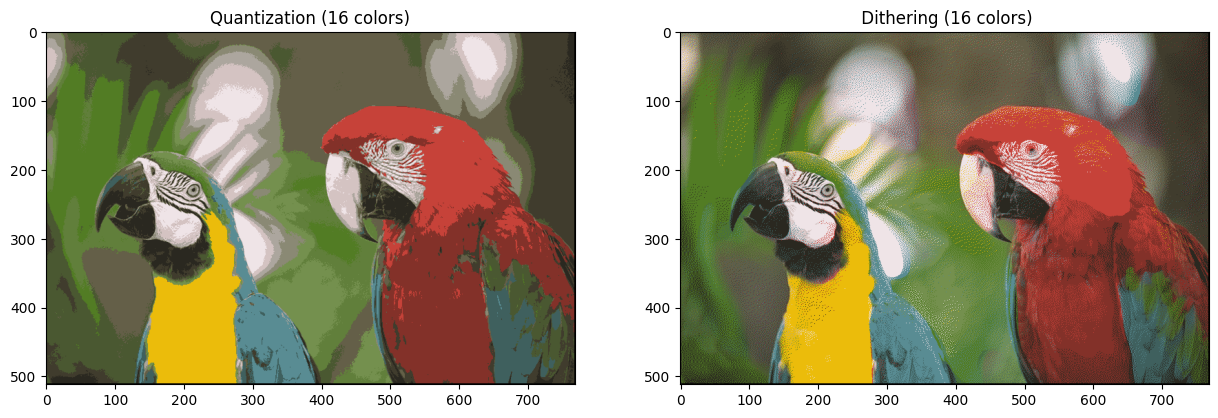

In [130]:
# Quantization
img_tmp_kmeans = np.copy(img)
quanting_kmeans = np.zeros_like(img)

for r in range(1, rows-1):
    for c in range(1, cols-1):
        pixel = img_tmp_kmeans[r, c, :]
        distances =np.sqrt(np.sum((colors - pixel)**2, axis=1))
        index_of_closest_color = np.argmin(distances)
        new_pixel = colors[index_of_closest_color]
        quanting_kmeans[r, c, :] = new_pixel

# Dithering
img_tmp_kmeans_dithering = np.copy(img).astype(np.float32)
dithering_kmeans = np.zeros_like(img)
for r in range(1, rows-1):
    for c in range(1, cols-1):

        pixel = img_tmp_kmeans_dithering[r, c, :]

        distances = np.sqrt(np.sum((colors - pixel)**2, axis=1))
        index_of_closest_color = np.argmin(distances)
        new_pixel = colors[index_of_closest_color]

        quant_error = pixel - new_pixel

        img_tmp_kmeans_dithering[r, c+1]   += quant_error * 7 / 16
        img_tmp_kmeans_dithering[r+1, c-1] += quant_error * 3 / 16
        img_tmp_kmeans_dithering[r+1, c]   += quant_error * 5 / 16
        img_tmp_kmeans_dithering[r+1, c+1] += quant_error * 1 / 16

        dithering_kmeans[r, c, :] = new_pixel



# Сравним с оригиналом
plt.subplot(121), plt.imshow(quanting_kmeans.astype(np.uint8)), plt.title('Quantization (16 colors)')
plt.subplot(122), plt.imshow(dithering_kmeans.astype(np.uint8)), plt.title('Dithering (16 colors)')
plt.show()

Apply FS dithering the same way you did before.
* How does the result look like to you?
* What happens if we use 32 colours?
* And what happens if we use 256 colours?

### Answers
* The dithered image, of course. It looks almost like the original
* We get a result that is closer to the original, but it requires more computer resources to process.
* The result will be almost identical to the original, but the processing time will increase even more.

In [131]:
def process_image_with_palette(image, num_colors):

    print("Starting processing", num_colors, "colors...")
    rows, cols, _ = image.shape

    print("1/3: Creating palitte")
    kmeans = KMeans(n_clusters=num_colors).fit(np.reshape(image, (-1, 3)))
    colors = kmeans.cluster_centers_

    # --- Step 2: Simple Quantization ---
    print("2/3: Simple quantization....")
    quantized_image = np.zeros_like(image)

    for r in range(rows):
        for c in range(cols):
            pixel = image[r, c, :]
            distances = np.sqrt(np.sum((colors - pixel)**2, axis=1))
            index = np.argmin(distances)
            quantized_image[r, c, :] = colors[index]

    # --- Step 3: Floyd–Steinberg dithering ---
    print("3/3: Dithering...")
    dithered_image = np.zeros_like(image)
    img_tmp = image.astype(np.float32) # Create copy image for errors

    for r in range(1, rows-1):
        for c in range(1, cols-1):
            pixel = img_tmp[r, c, :]
            distances = np.sqrt(np.sum((colors - pixel)**2, axis=1))
            index = np.argmin(distances)
            new_pixel = colors[index]

            dithered_image[r, c, :] = new_pixel

            quant_error = pixel - new_pixel

            img_tmp[r, c+1]   += quant_error * 7 / 16
            img_tmp[r+1, c-1] += quant_error * 3 / 16
            img_tmp[r+1, c]   += quant_error * 5 / 16
            img_tmp[r+1, c+1] += quant_error * 1 / 16

    print("Completed\n")
    return quantized_image, dithered_image, colors


Starting processing 32 colors...
1/3: Creating palitte
2/3: Simple quantization....
3/3: Dithering...
Completed

Starting processing 256 colors...
1/3: Creating palitte
2/3: Simple quantization....
3/3: Dithering...
Completed



(<Axes: title={'center': 'Dithering (256 colors)'}>,
 Text(0.5, 1.0, 'Dithering (256 colors)'))

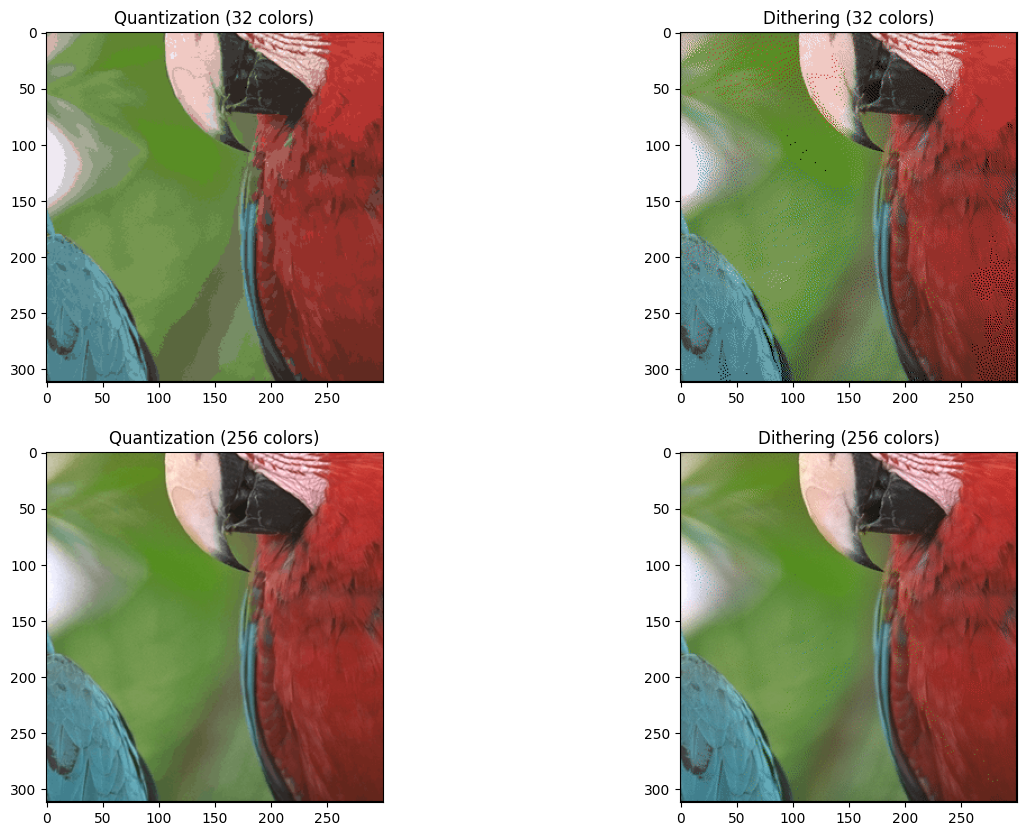

In [132]:

# ---- ATENTION! THIS MAY TAKE A LONG TIME ON WEAK COMUTERS ---
quant_32, dither_32, palette_32 = process_image_with_palette(img[200:600, 300:600, :], 32)
quant_256, dither_256, palette_256 = process_image_with_palette(img[200:600, 300:600, :], 256)

plt.subplot(221), plt.imshow(quant_32.astype(np.uint8)), plt.title('Quantization (32 colors)')
plt.subplot(222), plt.imshow(dither_32.astype(np.uint8)), plt.title('Dithering (32 colors)')
plt.subplot(223), plt.imshow(quant_256.astype(np.uint8)), plt.title('Quantization (256 colors)')
plt.subplot(224), plt.imshow(dither_256.astype(np.uint8)), plt.title('Dithering (256 colors)')
